In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-31 15:38:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  60.5MB/s    in 3.3s    

2025-03-31 15:38:30 (60.2 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 160.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 159.1 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 149.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 142.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 134.6 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
conn = sqlite3.connect('survey-data.sqlite')

In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


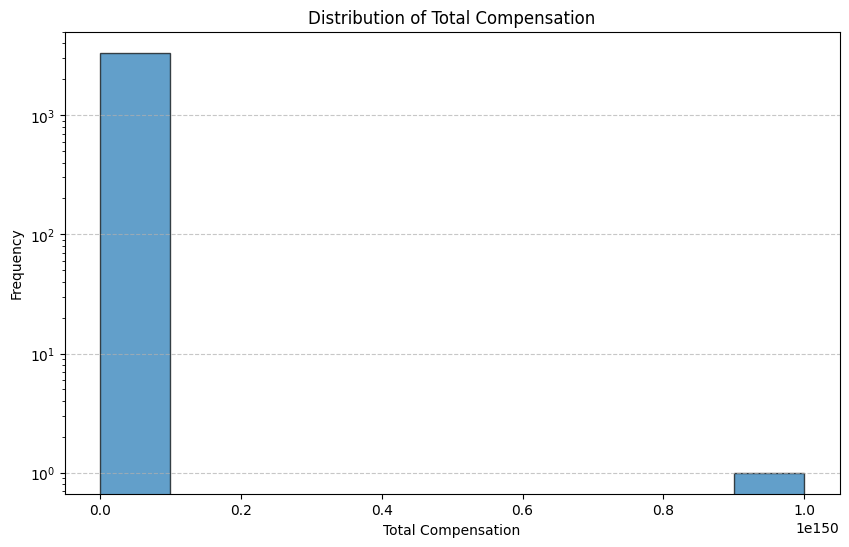

In [13]:
#1.1 Histogram of CompTotal (Total Compensation)
QUERY = """
SELECT CompTotal 
FROM main
GROUP BY CompTotal
ORDER BY CompTotal
"""
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.hist(df["CompTotal"], bins=10, edgecolor="black", alpha=0.7)
plt.xlabel("Total Compensation")
plt.ylabel("Frequency")
plt.title("Distribution of Total Compensation")
plt.yscale("log")  
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


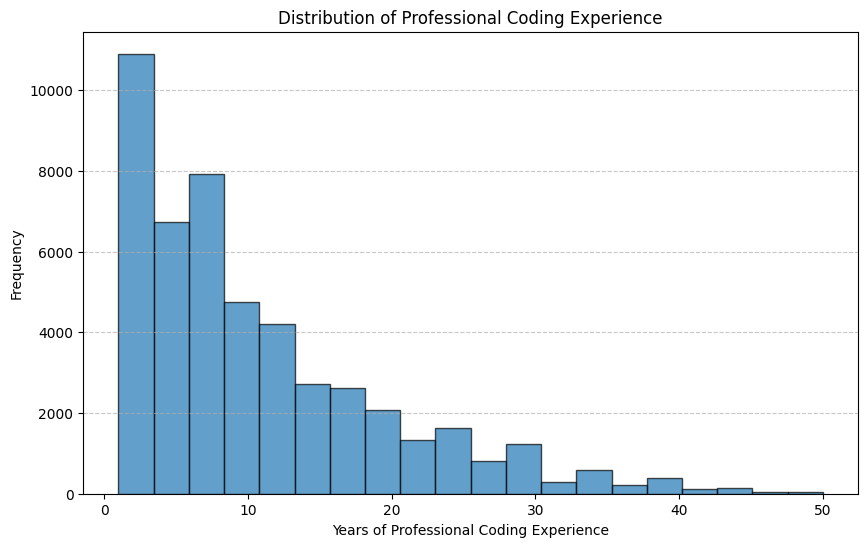

In [33]:
#1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)

QUERY = "SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)

df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(df["YearsCodePro"], bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Frequency")
plt.title("Distribution of Professional Coding Experience")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

/tmp/ipykernel_342/383890830.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Age Group")


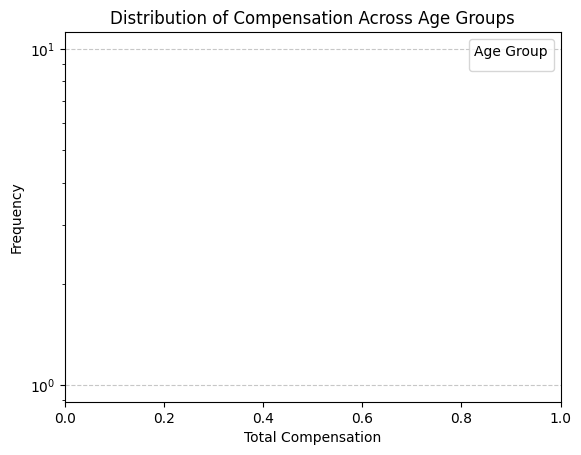

In [34]:
#2.1 Histogram Comparison of CompTotal by Age Group
QUERY = "SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL"

df = pd.read_sql_query(QUERY, conn)

df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")

bins = [18, 25, 35, 45, 55, 65]  
labels = ["18-24", "25-34", "35-44", "45-54", "55-64"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

plt.xlabel("Total Compensation")
plt.ylabel("Frequency")
plt.title("Distribution of Compensation Across Age Groups")
plt.legend(title="Age Group")
plt.yscale("log")  
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [29]:
QUERY = """
SELECT CompTotal, COUNT(*) as count 
FROM main 
GROUP BY CompTotal 
ORDER BY CompTotal
"""
df_comptotal = pd.read_sql_query(QUERY, conn)
print(df_comptotal)

          CompTotal  count
0               NaN  31697
1      0.000000e+00    127
2      1.000000e+00     12
3      2.000000e+00      4
4      3.000000e+00      1
...             ...    ...
3333   8.000000e+27      1
3334   1.000000e+44      1
3335   1.000000e+53      1
3336   1.000000e+65      1
3337  1.000000e+150      1

[3338 rows x 2 columns]


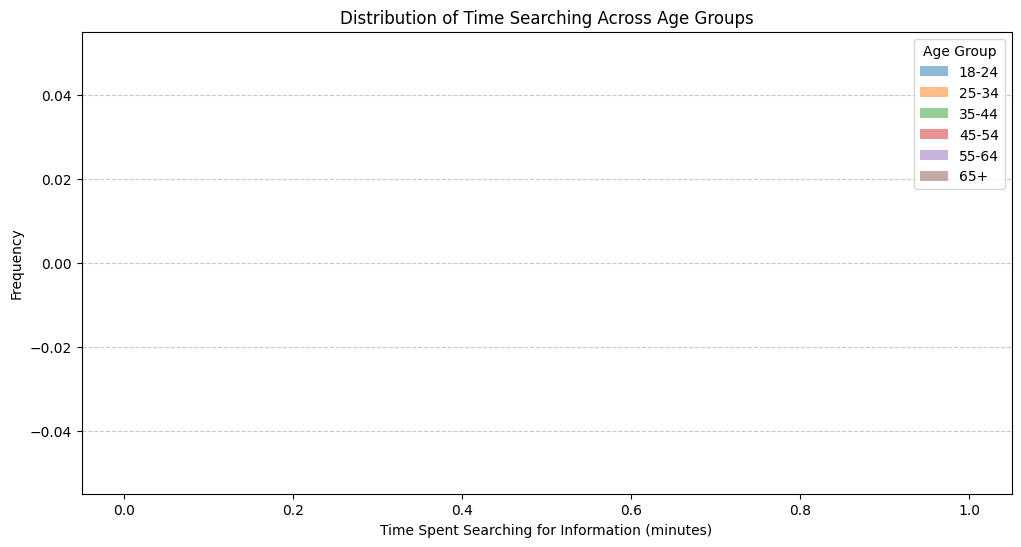

In [36]:
#2.2 Histogram of TimeSearching for Different Age Groups
QUERY = "SELECT Age, TimeSearching FROM main WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL"
df = pd.read_sql_query(query, conn)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["TimeSearching"] = pd.to_numeric(df["TimeSearching"], errors="coerce")


bins = [18, 25, 35, 45, 55, 65, 75] 
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)


plt.figure(figsize=(12, 6))
for age_group in labels:
    subset = df[df["AgeGroup"] == age_group]["TimeSearching"]
    plt.hist(subset, bins=20, alpha=0.5, label=age_group)

plt.xlabel("Time Spent Searching for Information (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Time Searching Across Age Groups")
plt.legend(title="Age Group")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

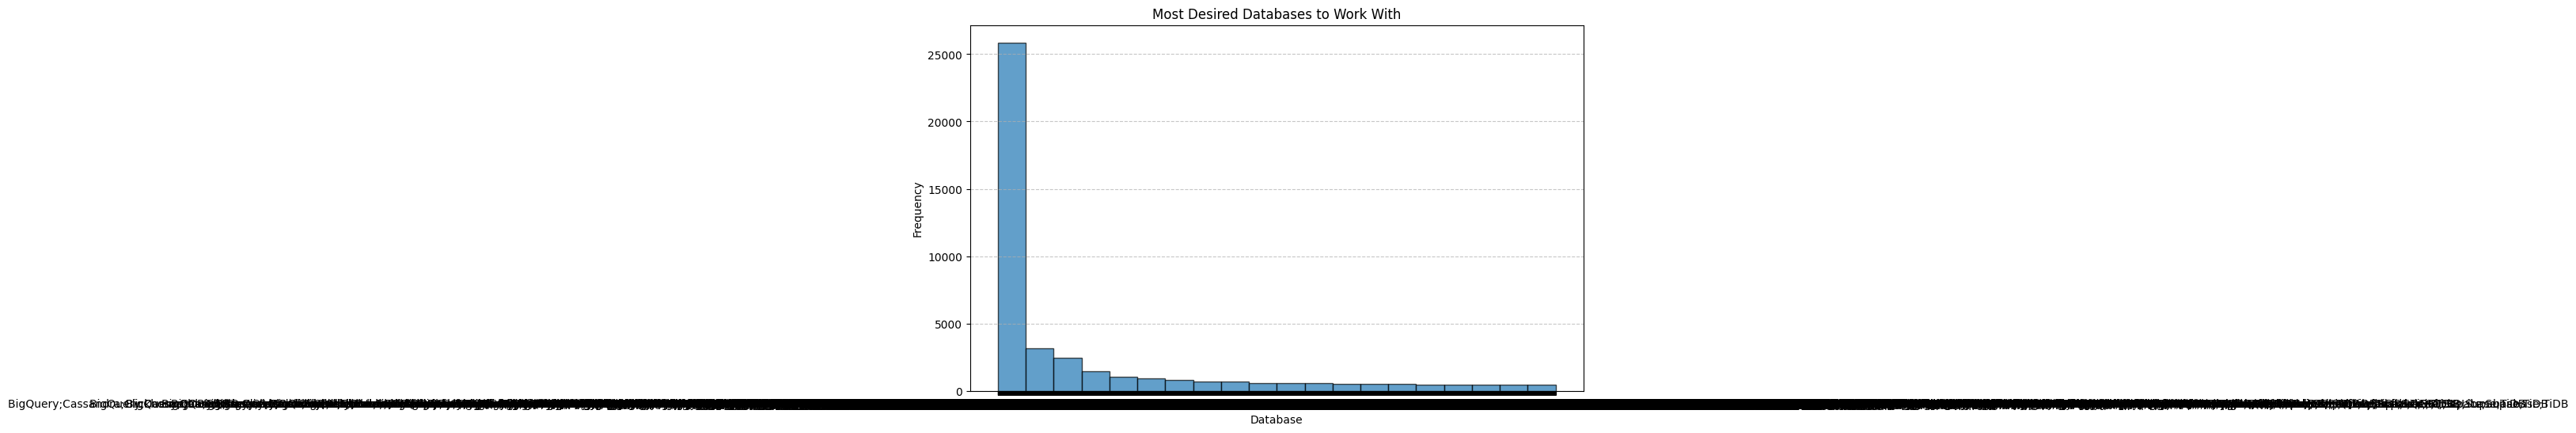

In [40]:
#3.1 Histogram of Most Desired Databases (DatabaseWantToWorkWith)
QUERY = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
df = pd.read_sql_query(query, conn)
database_counts = df.value_counts()
plt.figure(figsize=(10, 6))
plt.hist(df["DatabaseWantToWorkWith"], bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Database")
plt.ylabel("Frequency")
plt.title("Most Desired Databases to Work With")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [45]:
#3.2 Histogram of Preferred Work Locations (RemoteWork)
QUERY = "SELECT RemoteWork FROM main" 
df = pd.read_sql_query(query, conn)
plt.figure(figsize=(10, 6))
plt.hist(df["RemoteWork"], bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("RemoteWork")
plt.ylabel("Frequency")
plt.title("Distribution of preferred work arrangements ")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

KeyError: 'RemoteWork'

<Figure size 1000x600 with 0 Axes>

In [42]:
QUERY = """
SELECT RemoteWork
FROM main 
GROUP BY RemoteWork
ORDER BY RemoteWork
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                             RemoteWork
0                                  None
1  Hybrid (some remote, some in-person)
2                             In-person
3                                Remote


In [46]:
#4.1 Histogram of Median CompTotal for Ages 45 to 60
QUERY = """
SELECT Age, CompTotal 
FROM main
WHERE Age BETWEEN 45 AND 60 
AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce").dropna()


median_comp = df["CompTotal"].median()


plt.figure(figsize=(10, 6))
plt.hist(df["CompTotal"], bins=30, edgecolor="black", alpha=0.7)
plt.axvline(median_comp, color="red", linestyle="dashed", linewidth=2, label=f"Median: {median_comp:,.0f}")
plt.xlabel("Total Compensation")
plt.ylabel("Frequency")
plt.title("Distribution of Compensation (Ages 45-60)")
plt.yscale("log") 
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


KeyError: 'CompTotal'

In [48]:
#4.2 Histogram of Job Satisfaction (JobSat) by YearsCodePro
QUERY = """
SELECT YearsCodePro, JobSat 
FROM main 
WHERE YearsCodePro IS NOT NULL 
AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

df["YearsCodePro"] = df["YearsCodePro"].replace({"Less than 1 year": "0.5", "More than 50 years": "51"})
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")


bins = [0, 5, 10, 15, 20, 30, 40, 50]
labels = ["0-4", "5-9", "10-14", "15-19", "20-29", "30-39", "40+"]
df["ExperienceGroup"] = pd.cut(df["YearsCodePro"], bins=bins, labels=labels, right=False)


plt.figure(figsize=(12, 6))
for exp_group in labels:
    subset = df[df["ExperienceGroup"] == exp_group]["JobSat"]
    plt.hist(subset, bins=5, alpha=0.5, label=exp_group)

plt.xlabel("Job Satisfaction (1=Very Dissatisfied, 5=Very Satisfied)")
plt.ylabel("Frequency")
plt.title("Job Satisfaction Distribution by Years of Professional Coding")
plt.legend(title="Experience (Years)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

KeyError: 'YearsCodePro'